<a href="https://colab.research.google.com/github/ismaelrobertorodriguez/marketing880/blob/main/geopandas19April.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

I.  Software Preparation

In [135]:
# install pygeos

!pip install pygeos

In [122]:
# install Rtree libraries for use in geopandas

# adapted from https://stackoverflow.com/questions/48293601/how-to-install-libspatialindex-on-google-colaboratory
# loading process copied from https://colab.research.google.com/drive/1N7i9zmOwVcUzd4eHWZux4p_WTBMZHi8C 
!apt-get install -qq curl g++ make 


In [123]:
!curl -L http://download.osgeo.org/libspatialindex/spatialindex-src-1.8.5.tar.gz | tar xz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  556k  100  556k    0     0   659k      0 --:--:-- --:--:-- --:--:--  658k


In [124]:
import os
os.chdir('spatialindex-src-1.8.5')

In [125]:
!./configure

checking build system type... x86_64-unknown-linux-gnu
checking for g++... g++
checking whether the C++ compiler works... yes
checking for C++ compiler default output file name... a.out
checking for suffix of executables... 
checking whether we are cross compiling... no
checking for suffix of object files... o
checking whether we are using the GNU C++ compiler... yes
checking whether g++ accepts -g... yes
checking how to run the C++ preprocessor... g++ -E
checking for a BSD-compatible install... /usr/bin/install -c
checking whether ln -s works... yes
checking whether make sets $(MAKE)... yes
checking host system type... x86_64-unknown-linux-gnu
checking how to print strings... printf
checking for gcc... gcc
checking whether we are using the GNU C compiler... yes
checking whether gcc accepts -g... yes
checking for gcc option to accept ISO C89... none needed
checking whether gcc understands -c and -o together... yes
checking for a sed that does not truncate output... /bin/sed
checking fo

In [126]:
!make

Making all in src
make[1]: Entering directory '/content/spatialindex-src-1.8.5/spatialindex-src-1.8.5/spatialindex-src-1.8.5/src'
Making all in storagemanager
make[2]: Entering directory '/content/spatialindex-src-1.8.5/spatialindex-src-1.8.5/spatialindex-src-1.8.5/src/storagemanager'
depbase=`echo Buffer.lo | sed 's|[^/]*$|.deps/&|;s|\.lo$||'`;\
/bin/bash ../../libtool  --tag=CXX   --mode=compile g++ -DPACKAGE_NAME=\"spatialindex\" -DPACKAGE_TARNAME=\"spatialindex-src\" -DPACKAGE_VERSION=\"1.8.5\" -DPACKAGE_STRING=\"spatialindex\ 1.8.5\" -DPACKAGE_BUGREPORT=\"mhadji@gmail.com\" -DPACKAGE_URL=\"\" -DSTDC_HEADERS=1 -DHAVE_SYS_TYPES_H=1 -DHAVE_SYS_STAT_H=1 -DHAVE_STDLIB_H=1 -DHAVE_STRING_H=1 -DHAVE_MEMORY_H=1 -DHAVE_STRINGS_H=1 -DHAVE_INTTYPES_H=1 -DHAVE_STDINT_H=1 -DHAVE_UNISTD_H=1 -DHAVE_DLFCN_H=1 -DLT_OBJDIR=\".libs/\" -DPACKAGE=\"spatialindex-src\" -DVERSION=\"1.8.5\" -DHAVE_FCNTL_H=1 -DHAVE_UNISTD_H=1 -DHAVE_SYS_TYPES_H=1 -DHAVE_SYS_STAT_H=1 -DHAVE_PTHREAD_H=1 -DHAVE_SYS_RESOURCE_H=

In [127]:
!make install

Making install in src
make[1]: Entering directory '/content/spatialindex-src-1.8.5/spatialindex-src-1.8.5/spatialindex-src-1.8.5/src'
Making install in storagemanager
make[2]: Entering directory '/content/spatialindex-src-1.8.5/spatialindex-src-1.8.5/spatialindex-src-1.8.5/src/storagemanager'
make[3]: Entering directory '/content/spatialindex-src-1.8.5/spatialindex-src-1.8.5/spatialindex-src-1.8.5/src/storagemanager'
make[3]: Nothing to be done for 'install-exec-am'.
make[3]: Nothing to be done for 'install-data-am'.
make[3]: Leaving directory '/content/spatialindex-src-1.8.5/spatialindex-src-1.8.5/spatialindex-src-1.8.5/src/storagemanager'
make[2]: Leaving directory '/content/spatialindex-src-1.8.5/spatialindex-src-1.8.5/spatialindex-src-1.8.5/src/storagemanager'
Making install in spatialindex
make[2]: Entering directory '/content/spatialindex-src-1.8.5/spatialindex-src-1.8.5/spatialindex-src-1.8.5/src/spatialindex'
make[3]: Entering directory '/content/spatialindex-src-1.8.5/spatiali

In [128]:
!pip install rtree

In [129]:
!ldconfig

/sbin/ldconfig.real: /usr/local/lib/python3.7/dist-packages/ideep4py/lib/libmkldnn.so.0 is not a symbolic link



In [133]:
from rtree import index
from rtree.index import Rtree

In [136]:
p = index.Property()
idx = index.Index(properties=p)
idx

rtree.index.Index(bounds=[1.7976931348623157e+308, 1.7976931348623157e+308, -1.7976931348623157e+308, -1.7976931348623157e+308], size=0)

In [137]:
# copied from https://cybergisxhub.cigi.illinois.edu/notebook/spatial-data-exploration-and-visualization-on-google-colab/

!sudo apt-get update && apt-get install -y libspatialindex-dev

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:5 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:11 http://security.ubuntu.com/ubuntu bionic-security/multiverse amd64 Packages [24.5 kB]
Get:12 http://security.ubuntu.

In [139]:
import rtree

In [1]:
# Adapted from https://geopandas.org/getting_started/install.html

!pip install geopandas

     |████████████████████████████████| 1.0MB 5.4MB/s 
     |████████████████████████████████| 15.3MB 247kB/s 
     |████████████████████████████████| 6.5MB 44.1MB/s 


In [2]:
!pip install mapclassify

In [3]:
import numpy as np
import pandas as pd
import shapely
import fiona
import pyproj
import matplotlib
import mapclassify

In [8]:
# adapted from https://geopandas.org/getting_started/introduction.html

import geopandas

# II.  Data Preparation

### A.  ZIP Code Prep


In [63]:
formattedCovid = pd.read_excel('https://raw.githubusercontent.com/ismaelrobertorodriguez/marketing880/main/formattedCOVID.xlsx')

In [64]:
# NY Community District data exported from https://data.cityofnewyork.us/City-Government/Community-Districts/yfnk-k7r4 
#  github adapted from https://stackoverflow.com/questions/39065921/what-do-raw-githubusercontent-com-urls-represent 
# dataPath= geopandas.datasets.get_path('nybb')

#communityDistrict = geopandas.read_file('/content/Community Districts.geojson')

communityDistrict = geopandas.read_file('https://raw.githubusercontent.com/ismaelrobertorodriguez/marketing880/main/Community%20Districts.geojson')

In [65]:
# Zip Code Tabulation Area (ZCTA) data exported from https://data.cityofnewyork.us/Health/Modified-Zip-Code-Tabulation-Areas-MODZCTA-/pri4-ifjk/data?no_mobile=true 

zipAreas = geopandas.read_file('https://raw.githubusercontent.com/ismaelrobertorodriguez/marketing880/main/Modified%20Zip%20Code%20Tabulation%20Areas%20(MODZCTA).geojson')

### B.  PUMA Sub-Borough Prep


In [4]:
# load data  # adapted from github instructions at

censusPUMA = pd.read_csv('https://raw.githubusercontent.com/ismaelrobertorodriguez/marketing880/main/censusPUMANYC5Year.csv')

In [5]:
censusPUMA.head()

Borough        Sub-Borough Area-PUMA  ...  pctWhite5yearChange  pctGraduation
0   Bronx       Mott Haven/Hunts Point  ...                0.249          0.595
1   Bronx           Morrisania/Belmont  ...               -0.267          0.642
2   Bronx   Highbridge/South Concourse  ...                1.098          0.653
3   Bronx   University Heights/Fordham  ...               -0.026          0.657
4   Bronx  Kingsbridge Heights/Mosholu  ...               -0.190          0.686

[5 rows x 16 columns]

In [9]:
# Public Use Microdata Area (PUMA) Data exported from https://data.cityofnewyork.us/Housing-Development/Public-Use-Microdata-Areas-PUMA-/cwiz-gcty 

pumaSubBoroughs = geopandas.read_file('https://raw.githubusercontent.com/ismaelrobertorodriguez/marketing880/main/Public%20Use%20Microdata%20Areas%20(PUMA).geojson')

In [11]:
pumaSubBoroughs['pumaIndex'] = pumaSubBoroughs['puma'].astype('float64')

In [12]:
pumaSubBoroughs.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   puma        55 non-null     object  
 1   shape_area  55 non-null     object  
 2   shape_leng  55 non-null     object  
 3   geometry    55 non-null     geometry
 4   pumaIndex   55 non-null     float64 
dtypes: float64(1), geometry(1), object(3)
memory usage: 2.3+ KB


In [13]:
censusPUMA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Borough                        55 non-null     object 
 1   Sub-Borough Area-PUMA          55 non-null     object 
 2   GeoID-PUMA                     55 non-null     int64  
 3   censusPUMA                     55 non-null     int64  
 4   RentBurden_5yearPctChg         55 non-null     float64
 5   RentorIncome_5yearPctChg       55 non-null     float64
 6   HomeOwnershipRate_5yearChange  55 non-null     float64
 7   HousingUnits_5yearChange       55 non-null     float64
 8   HomeOwnerIncome_5yearChange    55 non-null     float64
 9   population5yearChange          55 non-null     float64
 10  povertyRate5yearchange         55 non-null     float64
 11  pctAsian5yearChange            55 non-null     float64
 12  pctBlack5yearChange            55 non-null     float

In [15]:
pumaMAP = censusPUMA.set_index('censusPUMA').join(pumaSubBoroughs.set_index('pumaIndex'))


In [ ]:
# transform join dataframe to geodataframe

In [16]:
# adapted from https://geopandas.org/gallery/create_geopandas_from_pandas.html

pumaGEO = geopandas.GeoDataFrame(pumaMAP)

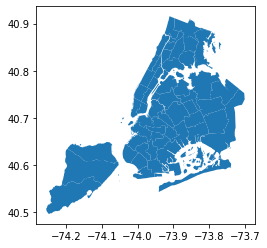

In [17]:
pumaGEO.plot()

In [19]:
pumaGEO.head(2)

Borough  ...                                           geometry
censusPUMA          ...                                                   
3710         Bronx  ...  MULTIPOLYGON (((-73.89681 40.79581, -73.89694 ...
3705         Bronx  ...  MULTIPOLYGON (((-73.87046 40.86663, -73.87042 ...

[2 rows x 19 columns]

In [ ]:
pumaGEO.info()

B.  Initial Exploratory Analysis Choropleth Mapping

In [20]:
import plotly.express as px


In [39]:


fig = px.choropleth_mapbox(pumaGEO, geojson=pumaGEO.geometry, locations=pumaGEO.population5yearChange, center={"lat": 40.7, "lon": -74}, mapbox_style="open-street-map",
                           zoom=8.5)

In [36]:
fig.show()

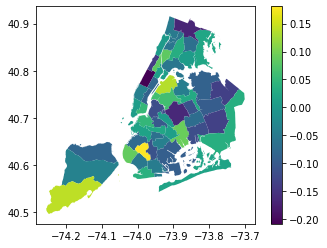

In [44]:
#adapted from https://geopandas.org/docs/user_guide/mapping.html

# create a choropleth map
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1)
pumaGEO.plot(column='RentBurden_5yearPctChg', ax=ax, legend=True)



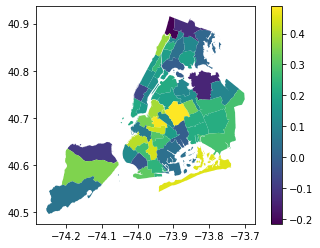

In [43]:
fig, ax = plt.subplots(1,1)
pumaGEO.plot(column='RentorIncome_5yearPctChg', ax=ax, legend=True)

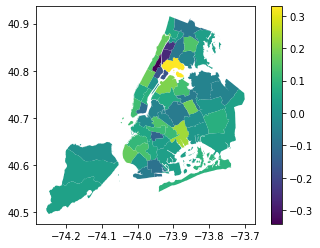

In [45]:
fig, ax = plt.subplots(1,1)
pumaGEO.plot(column='HomeOwnershipRate_5yearChange', ax=ax, legend=True)

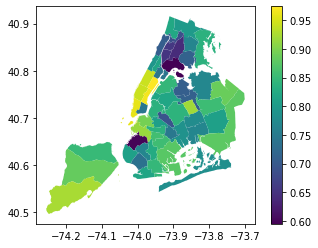

In [46]:
# pctGraduation

fig, ax = plt.subplots(1,1)
pumaGEO.plot(column='pctGraduation', ax=ax, legend=True)

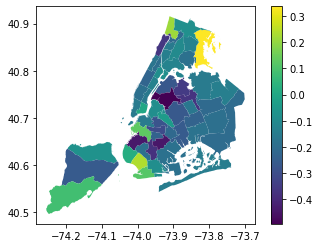

In [47]:
# povertyRate5yearchange 

fig, ax = plt.subplots(1,1)
pumaGEO.plot(column='povertyRate5yearchange', ax=ax, legend=True)

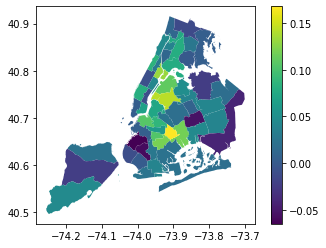

In [48]:
# HousingUnits_5yearChange 

fig, ax = plt.subplots(1,1)
pumaGEO.plot(column='HousingUnits_5yearChange', ax=ax, legend=True)

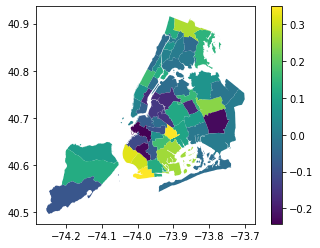

In [49]:
# pctWhite5yearChange

fig, ax = plt.subplots(1,1)
pumaGEO.plot(column='pctHisp5yearChange', ax=ax, legend=True)

C.  Combine 2018 rates with PUMA Map.

In [50]:
#join 2018 puma rates to puma map

ratesPUMA2018 = pd.read_excel('https://raw.githubusercontent.com/ismaelrobertorodriguez/marketing880/main/pumaRates2018.xlsx')


In [51]:
ratesPUMA2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   short_name                    55 non-null     object 
 1   long_name                     55 non-null     object 
 2   Sub-Borough Area              55 non-null     object 
 3   Sub-Borough Area-Rent Burden  55 non-null     object 
 4   GeoID-rentBurden              55 non-null     float64
 5   censusPUMA                    55 non-null     float64
 6   homeownerIncome2018           55 non-null     float64
 7   crowdingPercentage2018        302 non-null    float64
 8   housingUnits2018              55 non-null     float64
 9   ownershipRate2018             55 non-null     float64
 10  renterIncome2018              55 non-null     float64
 11  rentBurden2018                55 non-null     float64
 12  graduation2013-2017           114 non-null    float64
 13  pover

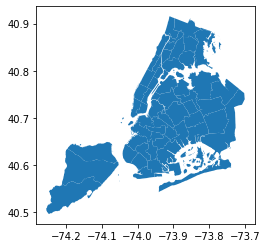

In [52]:
puma2018map = ratesPUMA2018.set_index('censusPUMA').join(pumaSubBoroughs.set_index('pumaIndex'))
puma2018plot = geopandas.GeoDataFrame(puma2018map)
puma2018plot.plot()

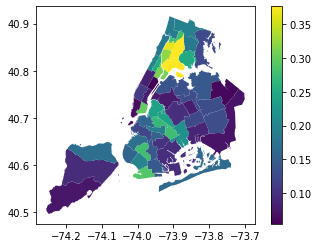

In [53]:
fig, ax = plt.subplots(1,1)
puma2018plot.plot(column='poverty2018', ax=ax, legend=True)

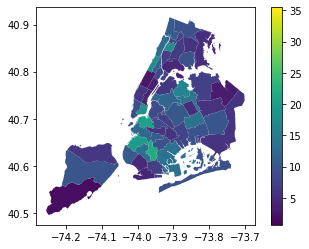

In [54]:
fig, ax = plt.subplots(1,1)
puma2018plot.plot(column='crowdingPercentage2018', ax=ax, legend=True)

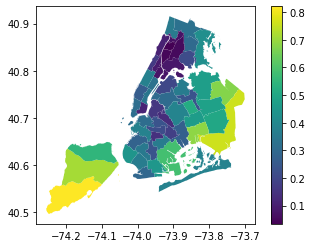

In [55]:
fig, ax = plt.subplots(1,1)
puma2018plot.plot(column='ownershipRate2018', ax=ax, legend=True)

In [56]:
puma2018plot.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Float64Index: 302 entries, 3701.0 to nan
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   short_name                    55 non-null     object  
 1   long_name                     55 non-null     object  
 2   Sub-Borough Area              55 non-null     object  
 3   Sub-Borough Area-Rent Burden  55 non-null     object  
 4   GeoID-rentBurden              55 non-null     float64 
 5   homeownerIncome2018           55 non-null     float64 
 6   crowdingPercentage2018        302 non-null    float64 
 7   housingUnits2018              55 non-null     float64 
 8   ownershipRate2018             55 non-null     float64 
 9   renterIncome2018              55 non-null     float64 
 10  rentBurden2018                55 non-null     float64 
 11  graduation2013-2017           114 non-null    float64 
 12  poverty2018                   55 no

ZIP Code Choropleth Mapping


In [67]:
zipAreas.head()

label  ...                                           geometry
0  10001, 10118  ...  MULTIPOLYGON (((-73.98774 40.74407, -73.98819 ...
1         10002  ...  MULTIPOLYGON (((-73.99750 40.71407, -73.99709 ...
2         10003  ...  MULTIPOLYGON (((-73.98864 40.72293, -73.98876 ...
3         10026  ...  MULTIPOLYGON (((-73.96201 40.80551, -73.96007 ...
4         10004  ...  MULTIPOLYGON (((-74.00827 40.70772, -74.00937 ...

[5 rows x 5 columns]

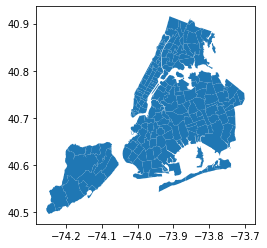

In [68]:
zipAreas.plot()

In [69]:
zipAreas.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [70]:
# set geospatial projection to EPSG 3635, (NAD83-NSRS2007 for New York East)
# adapted from https://spatialreference.org/ref/epsg/?page=33, https://geopandas.org/docs/user_guide/projections.html?highlight=spatialreference%20or, and https://gis.stackexchange.com/questions/372564/userwarning-when-trying-to-get-centroid-from-a-polygon-geopandas 
# research conducted to resolve crs projection warning
#adapted from https://geopandas.org/getting_started/introduction.html and https://geopandas.org/docs/user_guide/mapping.html

zipAreas = zipAreas.to_crs(epsg=3625)
pumaSubBoroughs = pumaSubBoroughs.to_crs(epsg=3625)


In [71]:
zipAreas['centroid'] = zipAreas.centroid

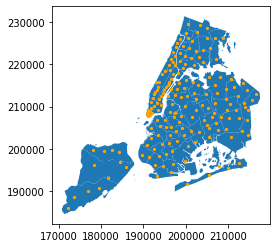

In [72]:
# adapted from https://geopandas.org/docs/user_guide/mapping.html and https://geopandas.org/getting_started/introduction.html 
ax = pumaSubBoroughs['geometry'].plot()
zipAreas['centroid'].plot(ax=ax, color='orange',markersize=5, figsize=(40,40))

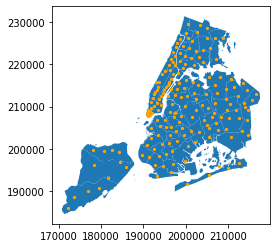

In [73]:
ax = pumaSubBoroughs['geometry'].plot()
zipAreas['centroid'].plot(ax=ax, color='orange',markersize=5)

In [ ]:
# Add background map adapted from https://geopandas.org/gallery/plotting_basemap_background.html?highlight=plot

In [74]:
!pip install contextily

     |████████████████████████████████| 19.1MB 1.3MB/s 


In [75]:
import contextily as ctx

In [76]:
zipAreas.head()

label  ...                       centroid
0  10001, 10118  ...  POINT (192463.281 212985.523)
1         10002  ...  POINT (193411.735 209114.770)
2         10003  ...  POINT (193149.159 210895.020)
3         10026  ...  POINT (196182.303 218748.039)
4         10004  ...  POINT (191150.011 207765.672)

[5 rows x 6 columns]

In [77]:
formattedCovid['modzcta'] = formattedCovid['MODIFIED_ZCTA']

In [78]:
formattedCovid.head()

MODIFIED_ZCTA                        NEIGHBORHOOD_NAME  ...   Timeframe  modzcta
0          10001               Chelsea/NoMad/West Chelsea  ...         NaN    10001
1          10002                Chinatown/Lower East Side  ...         NaN    10002
2          10003  East Village/Gramercy/Greenwich Village  ...         NaN    10003
3          10004                       Financial District  ...  Cumulative    10004
4          10005                       Financial District  ...  Cumulative    10005

[5 rows x 17 columns]

In [79]:

zipAreas.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   label     178 non-null    object  
 1   modzcta   178 non-null    object  
 2   pop_est   178 non-null    object  
 3   zcta      178 non-null    object  
 4   geometry  178 non-null    geometry
 5   centroid  178 non-null    geometry
dtypes: geometry(2), object(4)
memory usage: 8.5+ KB


In [80]:
# adapted from https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.astype.html

zipAreas['modzctaIndex'] = zipAreas['modzcta'].astype('int64')


In [82]:
formattedCovid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MODIFIED_ZCTA      177 non-null    int64  
 1   NEIGHBORHOOD_NAME  177 non-null    object 
 2   BOROUGH_GROUP      177 non-null    object 
 3   COVID_CASE_COUNT   177 non-null    int64  
 4   COVID_CASE_RATE    177 non-null    float64
 5   POP_DENOMINATOR    177 non-null    float64
 6   COVID_DEATH_COUNT  177 non-null    int64  
 7   COVID_DEATH_RATE   177 non-null    float64
 8   PERCENT_POSITIVE   177 non-null    float64
 9   TOTAL_COVID_TESTS  177 non-null    int64  
 10  Unnamed: 10        0 non-null      float64
 11  Unnamed: 11        0 non-null      float64
 12  Unnamed: 12        0 non-null      float64
 13  Unnamed: 13        0 non-null      float64
 14  Unnamed: 14        0 non-null      float64
 15  Timeframe          6 non-null      object 
 16  modzcta            177 non

In [84]:
zipAreas.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   label         178 non-null    object  
 1   modzcta       178 non-null    object  
 2   pop_est       178 non-null    object  
 3   zcta          178 non-null    object  
 4   geometry      178 non-null    geometry
 5   centroid      178 non-null    geometry
 6   modzctaIndex  178 non-null    int64   
dtypes: geometry(2), int64(1), object(4)
memory usage: 9.9+ KB


In [85]:
# adapted from https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.join.html

zipCOVID = formattedCovid.set_index('modzcta').join(zipAreas.set_index('modzctaIndex'))

In [86]:
zipCOVID.head()

MODIFIED_ZCTA  ...                       centroid
modzcta                 ...                               
10001            10001  ...  POINT (192463.281 212985.523)
10002            10002  ...  POINT (193411.735 209114.770)
10003            10003  ...  POINT (193149.159 210895.020)
10004            10004  ...  POINT (191150.011 207765.672)
10005            10005  ...  POINT (191500.230 208028.926)

[5 rows x 22 columns]

In [87]:
# adapted from https://geopandas.org/gallery/create_geopandas_from_pandas.html

zipCOVIDplot = geopandas.GeoDataFrame(zipCOVID)

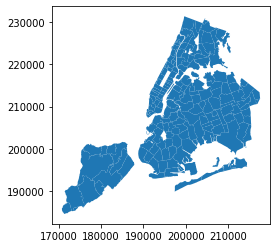

In [88]:
zipCOVIDplot.plot()

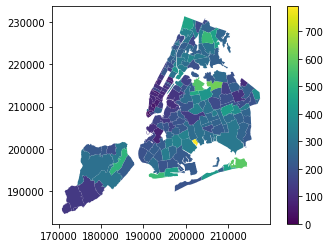

In [89]:
fig, ax = plt.subplots(1,1)
zipCOVIDplot.plot(column='COVID_DEATH_RATE', ax=ax, legend=True)

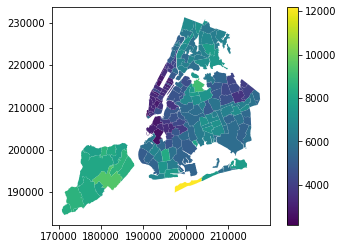

In [90]:
fig, ax = plt.subplots(1,1)
zipCOVIDplot.plot(column='COVID_CASE_RATE', ax=ax, legend=True)

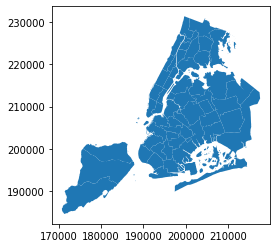

In [83]:
puma2018map = ratesPUMA2018.set_index('censusPUMA').join(pumaSubBoroughs.set_index('pumaIndex'))
puma2018plot = geopandas.GeoDataFrame(puma2018map)
puma2018plot.plot()

In [ ]:
#  Spatial Join
#  This matches polygon data and point data
#  POINT:  zipCOVID
#  POLYGON: puma2

In [ ]:
zipGeoCOVID2 = zipGeoCOVID.drop(labels='geometry',axis=1)

In [ ]:
# set geospatial projection to EPSG 3635, (NAD83-NSRS2007 for New York East)
# adapted from https://spatialreference.org/ref/epsg/?page=33, https://geopandas.org/docs/user_guide/projections.html?highlight=spatialreference%20or, and https://gis.stackexchange.com/questions/372564/userwarning-when-trying-to-get-centroid-from-a-polygon-geopandas 
# research conducted to resolve crs projection warning
#adapted from https://geopandas.org/getting_started/introduction.html and https://geopandas.org/docs/user_guide/mapping.html

zipAreas = zipAreas.to_crs(epsg=3625)
pumaSubBoroughs = pumaSubBoroughs.to_crs(epsg=3625)

In [93]:
zipAreas.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   label         178 non-null    object  
 1   modzcta       178 non-null    object  
 2   pop_est       178 non-null    object  
 3   zcta          178 non-null    object  
 4   geometry      178 non-null    geometry
 5   centroid      178 non-null    geometry
 6   modzctaIndex  178 non-null    int64   
dtypes: geometry(2), int64(1), object(4)
memory usage: 9.9+ KB


In [97]:
!pip install rtree

     |████████████████████████████████| 1.0MB 4.4MB/s 


In [98]:
!pip install pygeos

     |████████████████████████████████| 2.1MB 5.4MB/s 


In [106]:
zipPoints = zipAreas.set_geometry('centroid')

In [107]:
zipPoints.head()

label modzcta  ...                       centroid modzctaIndex
0  10001, 10118   10001  ...  POINT (192463.281 212985.523)        10001
1         10002   10002  ...  POINT (193411.735 209114.770)        10002
2         10003   10003  ...  POINT (193149.159 210895.020)        10003
3         10026   10026  ...  POINT (196182.303 218748.039)        10026
4         10004   10004  ...  POINT (191150.011 207765.672)        10004

[5 rows x 7 columns]

In [140]:
#adapted from https://gis.stackexchange.com/questions/224496/creating-spatial-join-between-points-and-polygons-in-geopandas
# troubleshooting adapted from https://stackoverflow.com/questions/53546775/overly-function-from-geopandas-not-working


points = zipPoints
polys = pumaSubBoroughs

zipInPuma = geopandas.sjoin(points,polys)

ImportError: ignored

In [ ]:
# join pumaTable and puma2

In [ ]:
# adapted from https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.join.html

pumaDATA = puma2.set_index('modzcta').join(zip2.set_index('modzctaIndex'))

In [ ]:
#  TO DO:
#  Create ZIP CODE MAP with Rates from Borough

#  Spatial union point and polygon data

# ENDSTATE:  ZIPCODE level Table with All average rates from borough.  Time Permitting add CD.  
